In [1]:
#imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# %matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

#Metricas
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


#Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
path = "C:\\Users\\joset\\OneDrive\\Documentos\\Master Big Data UCM\\11- Machine Learning\\Tarea Final ML\\"

In [3]:
TainingLabels= pd.read_csv(path + "Training_Set_Labels.csv", sep=',')
TainingValues= pd.read_csv(path + "Training_Set_Values.Csv", sep=',')
TestValues= pd.read_csv(path + "Test_Values.Csv", sep=',')

## I. Análisis Exploratorio de los Datos

In [4]:
print('Tamaño Tabla TrainingLabels:',TainingLabels.shape[0])
print('Tamaño Tabla TainingValues:',TainingValues.shape[0])
print('Tamaño Tabla TestValue:',TestValues.shape[0])

Tamaño Tabla TrainingLabels: 59400
Tamaño Tabla TainingValues: 59400
Tamaño Tabla TestValue: 14850


In [5]:
TainingLabels.head(5)

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [6]:
TainingValues.head(5)

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   
2                   dam                   dam       surface   
3           machine dbh              borehole   groundwater   
4  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [7]:
tabla_fusion = pd.merge(TainingLabels, TainingValues, how='left', on='id')

Vemos como queda nuestra tabla Merge

In [8]:
tabla_fusion.status_group.head(5)

0        functional
1        functional
2        functional
3    non functional
4        functional
Name: status_group, dtype: object

vamos a cambiarn el valor de status_group por valores numericos

In [9]:
tabla_fusion.status_group.value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [10]:
label_dict = {"functional":0,"functional needs repair":1,"non functional":2}
tabla_fusion["status_group"] = tabla_fusion["status_group"].map(label_dict)
tabla_fusion.status_group

0        0
1        0
2        0
3        2
4        0
        ..
59395    0
59396    0
59397    0
59398    0
59399    0
Name: status_group, Length: 59400, dtype: int64

In [11]:
tabla_fusion.head(5)

id  status_group  amount_tsh date_recorded        funder  gps_height  \
0  69572             0      6000.0    2011-03-14         Roman        1390   
1   8776             0         0.0    2013-03-06       Grumeti        1399   
2  34310             0        25.0    2013-02-25  Lottery Club         686   
3  67743             2         0.0    2013-01-28        Unicef         263   
4  19728             0         0.0    2011-07-13   Action In A           0   

      installer  longitude   latitude              wpt_name  ...  \
0         Roman  34.938093  -9.856322                  none  ...   
1       GRUMETI  34.698766  -2.147466              Zahanati  ...   
2  World vision  37.460664  -3.821329           Kwa Mahundi  ...   
3        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu  ...   
4       Artisan  31.130847  -1.825359               Shuleni  ...   

   payment_type water_quality quality_group      quantity  quantity_group  \
0      annually          soft          good        enough          enough   
1     never pay          soft          good  insufficient    insufficient   
2    per bucket          soft          good        enough          enough   
3     never pay          soft          good           dry             dry   
4     never pay          soft          good      seasonal        seasonal   

                 source           source_type source_class  \
0                spring                spring  groundwater   
1  rainwater harvesting  rainwater harvesting      surface   
2                   dam                   dam      surface   
3           machine dbh              borehole  groundwater   
4  rainwater harvesting  rainwater harvesting      surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 41 columns]

Vamos a guardar la tabal merge en un nuevo CSV

In [12]:
tabla_fusion.to_csv("tabla_fusion.csv", index=False)

vamos a ver como son las variables que conforman nuestro Dataser

In [13]:
tabla_fusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  int64  
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

## Analisis variables Numerias

Vamos a ver cuales son las variables de tipo numericas

In [14]:
variables_numericas= [col for col in tabla_fusion.columns if 
                tabla_fusion[col].dtype in ['int64', 'float64']]
variables_numericas

['id',
 'status_group',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

vamos a ver algunas metricas de esas variables

In [15]:
tabla_fusion.describe()

id  status_group     amount_tsh    gps_height     longitude  \
count  59400.000000  59400.000000   59400.000000  59400.000000  59400.000000   
mean   37115.131768      0.841162     317.650385    668.297239     34.077427   
std    21453.128371      0.949794    2997.574558    693.116350      6.567432   
min        0.000000      0.000000       0.000000    -90.000000      0.000000   
25%    18519.750000      0.000000       0.000000      0.000000     33.090347   
50%    37061.500000      0.000000       0.000000    369.000000     34.908743   
75%    55656.500000      2.000000      20.000000   1319.250000     37.178387   
max    74247.000000      2.000000  350000.000000   2770.000000     40.345193   

           latitude   num_private   region_code  district_code    population  \
count  5.940000e+04  59400.000000  59400.000000   59400.000000  59400.000000   
mean  -5.706033e+00      0.474141     15.297003       5.629747    179.909983   
std    2.946019e+00     12.236230     17.587406       9.633649    471.482176   
min   -1.164944e+01      0.000000      1.000000       0.000000      0.000000   
25%   -8.540621e+00      0.000000      5.000000       2.000000      0.000000   
50%   -5.021597e+00      0.000000     12.000000       3.000000     25.000000   
75%   -3.326156e+00      0.000000     17.000000       5.000000    215.000000   
max   -2.000000e-08   1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

<Axes: xlabel='status_group', ylabel='amount_tsh'>

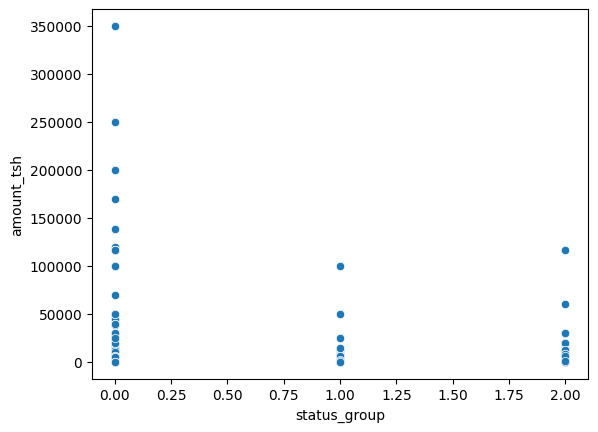

In [16]:
sns.scatterplot(y=tabla_fusion["amount_tsh"],x=tabla_fusion["status_group"])

Una primera intuicion nos dice que para que una bomba funcione deberia tener agua, es por lo tanto que la varible amount_tsh puede sernos de ayuda

Esto tambien nos hace pensar que la variable construction_year puede tener una relacion ya que las bombas mas antiaguas estaria propensas a no tener agua, vamos a ver la fucionalida segun el año

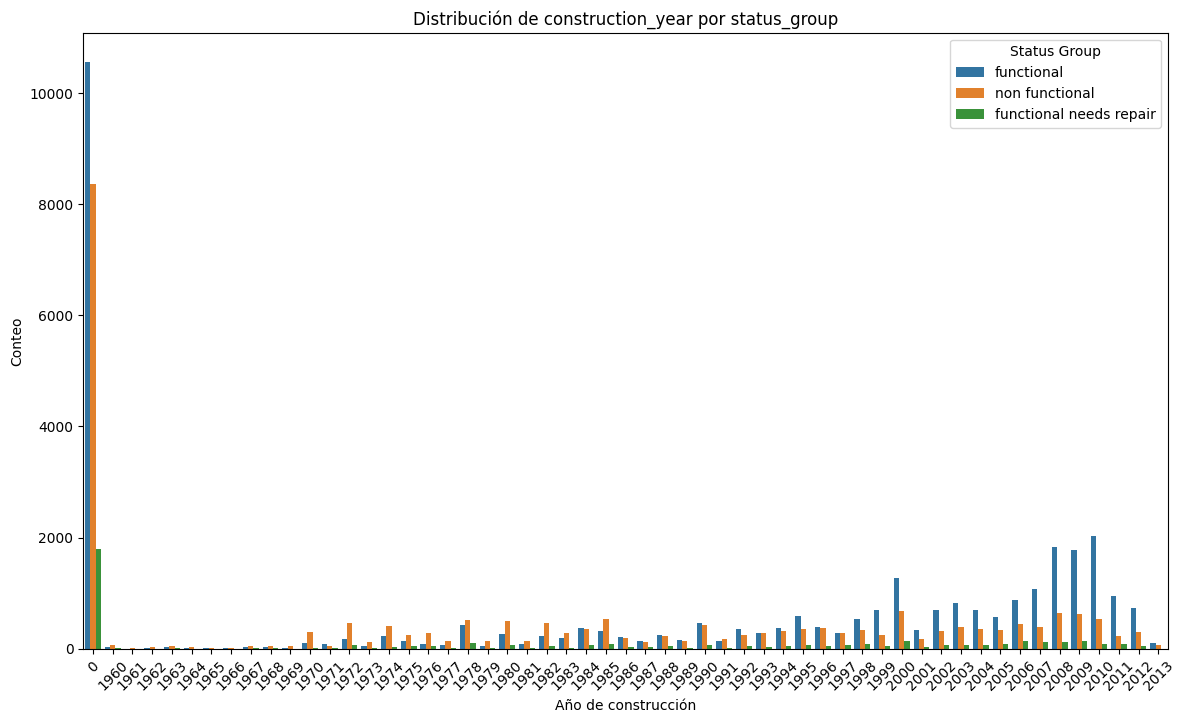

In [17]:
# Mapear las categorías de status_group a valores numéricos
label_dict = {0:"functional", 1:"functional needs repair",2:"non functional"}
tabla_fusion["status_group_numeric"] = tabla_fusion["status_group"].map(label_dict)
# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.countplot(x="construction_year", hue="status_group_numeric", data=tabla_fusion)
plt.title("Distribución de construction_year por status_group")
plt.xlabel("Año de construcción")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.legend(title="Status Group")
plt.show()

vamos que hay muchos valores en cero,algo raro pasa aqui, seguramente son datos mal imputados, ya veremos mas adelante que hacemos con ellos

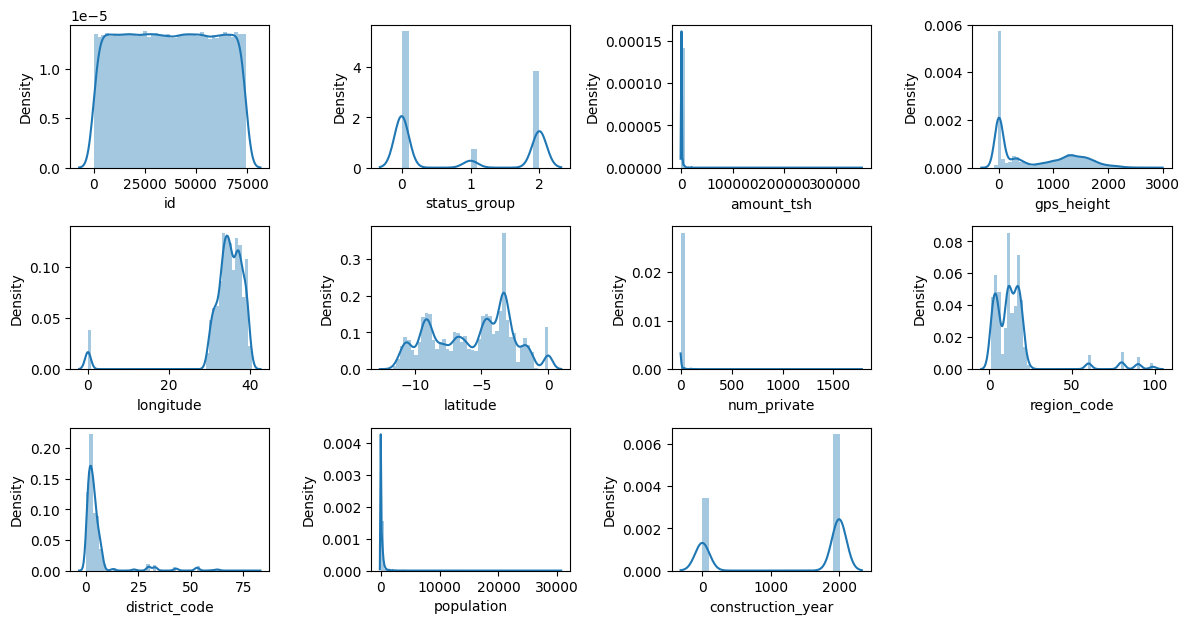

In [18]:
fig = plt.figure(figsize=(12,18))
pd.set_option('display.max_columns', None)
sns.distributions._has_statsmodels=False
for i in range(len(variables_numericas)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(tabla_fusion[variables_numericas].iloc[:,i].dropna())
    plt.xlabel(variables_numericas[i])
plt.tight_layout()
plt.show()

vamos a los datos atipicos para las varibles numericas

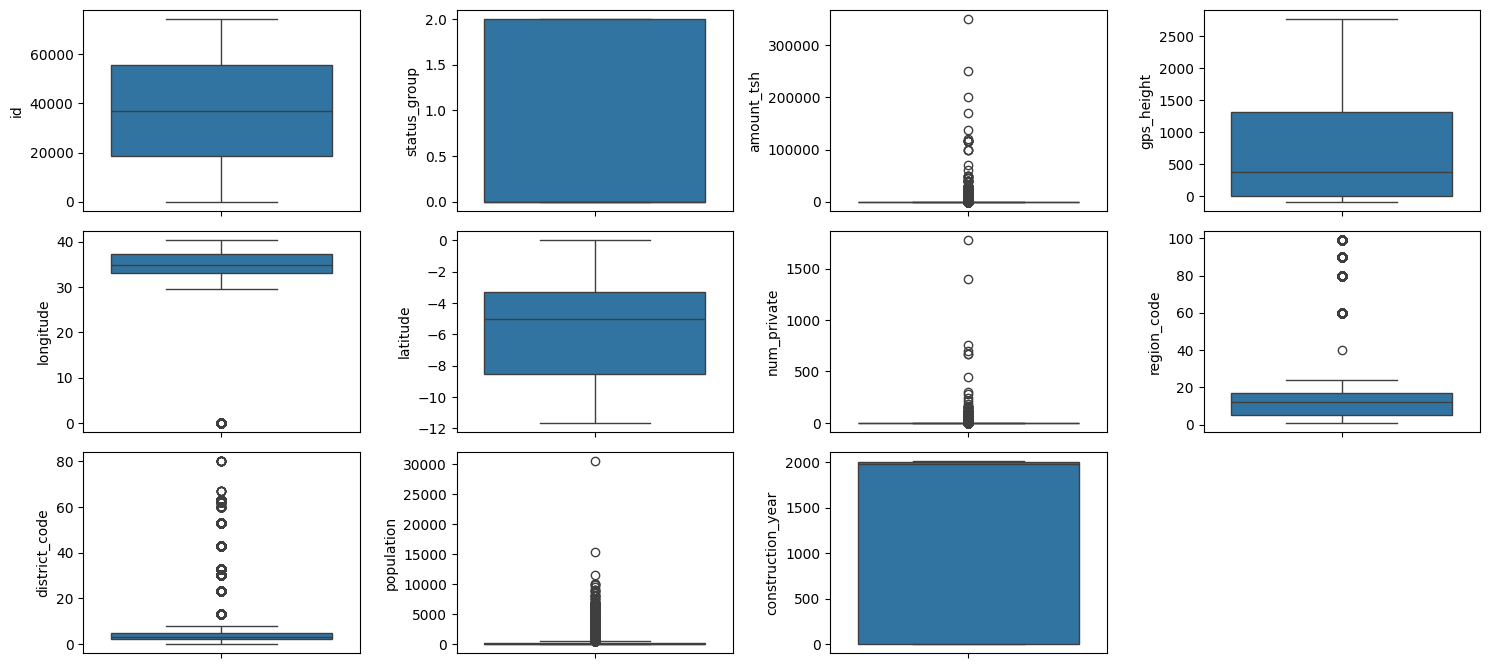

In [19]:
fig = plt.figure(figsize=(15, 20))

for i in range(len(variables_numericas)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=tabla_fusion[variables_numericas].iloc[:,i])

plt.tight_layout()
plt.show()

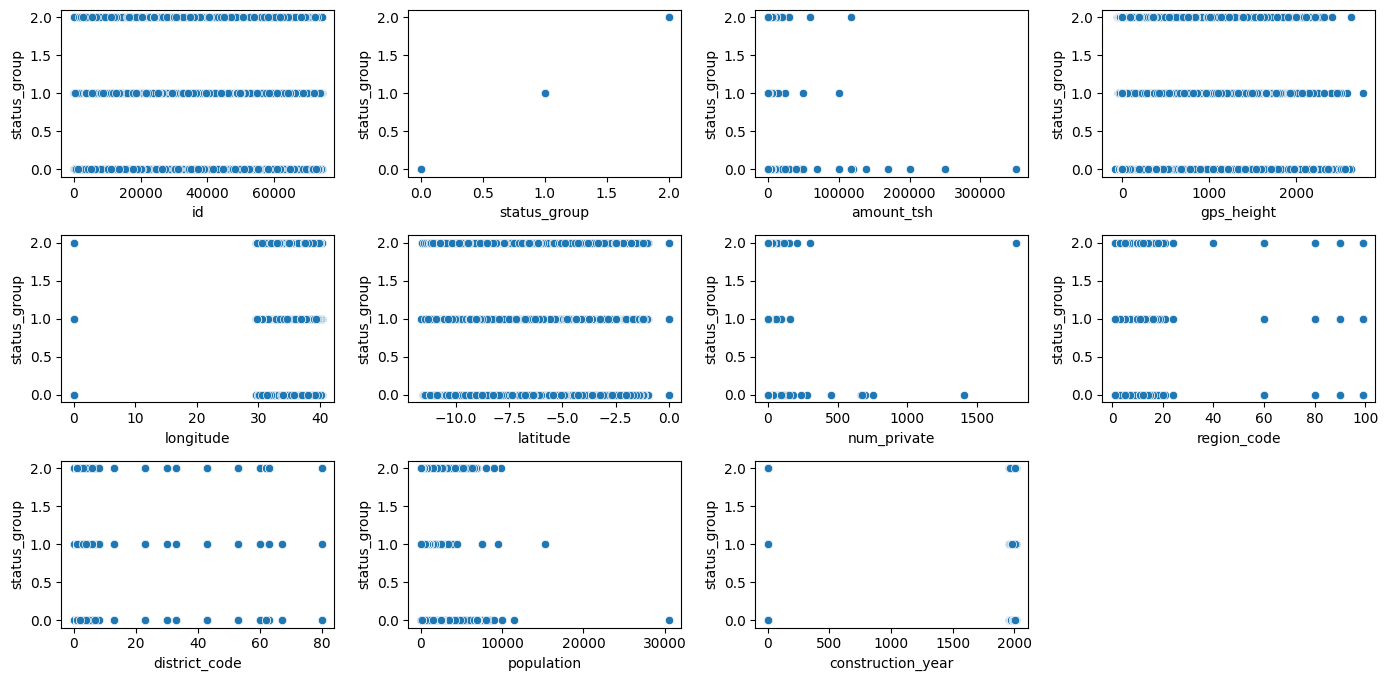

In [20]:
f = plt.figure(figsize=(14, 20))

for i, variable in enumerate(variables_numericas):
    ax = f.add_subplot(9, 4, i+1)
    sns.scatterplot(x=tabla_fusion[variable], y=tabla_fusion["status_group"], ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("status_group")
    
plt.tight_layout()
plt.show()

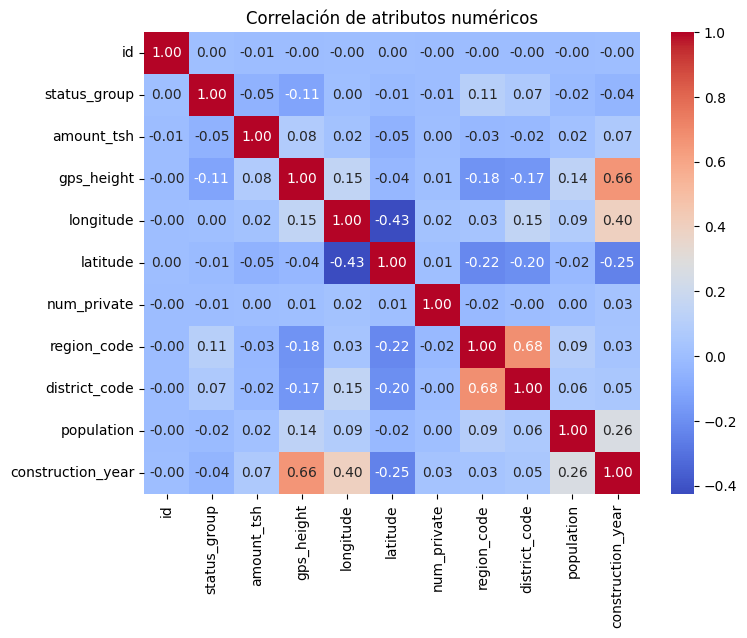

In [21]:
correlation = tabla_fusion[variables_numericas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de atributos numéricos', size=12)
plt.show()

la correlación entre district_code y region_code es bastante elevada. Por lo que es posible que se deba eliminar una de las dos.

La correlación existente entre construction_year y gps_height también es elevada, pero estas dos variables no tienen una relación tan evidente, por lo que lo investigaremos más en profundidad antes de tomar cualquier decisión.

ordenamos las variables de acuerdo a su influencia en la etiqueta label

In [22]:
correlation['status_group'].sort_values(ascending=False)

status_group         1.000000
region_code          0.108640
district_code        0.065687
longitude            0.004366
id                   0.004049
num_private         -0.005021
latitude            -0.014547
population          -0.017759
construction_year   -0.043342
amount_tsh          -0.053702
gps_height          -0.114029
Name: status_group, dtype: float64

vamos a nalizar si hay alguna bomba instalada en alguna poblacion que sea cero, esto debe ser raro pero no esta de mas mirar

In [23]:
ciudades_cero_poblacion = tabla_fusion[tabla_fusion['population'] ==0]['region'].unique()
print("Ciudades con población igual a cero:")
print(ciudades_cero_poblacion)

Ciudades con población igual a cero:
['Kagera' 'Shinyanga' 'Tabora' 'Dodoma' 'Mbeya' 'Iringa' 'Mwanza' 'Ruvuma'
 'Rukwa' 'Kigoma' 'Arusha' 'Singida' 'Pwani']


## Analisis variables categoricas

vamos a ver cuales son las variabes categoricas de nuestro dataset

In [24]:
variables_categoricas = tabla_fusion.select_dtypes(include='object').columns
variables_categoricas

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group_numeric'],
      dtype='object')

hacemos un pequeño analisis de esas variables categoricas

In [25]:
tabla_fusion.describe(include='object')

date_recorded                  funder installer wpt_name  \
count          59400                   55763     55745    59398   
unique           356                    1896      2145    37399   
top       2011-03-15  Government Of Tanzania       DWE     none   
freq             572                    9084     17402     3563   

                basin subvillage  region     lga   ward public_meeting  \
count           59400      59029   59400   59400  59400          56066   
unique              9      19287      21     125   2092              2   
top     Lake Victoria   Madukani  Iringa  Njombe  Igosi           True   
freq            10248        508    5294    2503    307          51011   

                    recorded_by scheme_management scheme_name permit  \
count                     59400             55522       30590  56344   
unique                        1                11        2695      2   
top     GeoData Consultants Ltd               VWC           K   True   
freq                      59400             36793         682  38852   

       extraction_type extraction_type_group extraction_type_class management  \
count            59400                 59400                 59400      59400   
unique              18                    13                     7         12   
top            gravity               gravity               gravity        vwc   
freq             26780                 26780                 26780      40507   

       management_group    payment payment_type water_quality quality_group  \
count             59400      59400        59400         59400         59400   
unique                5          7            7             8             6   
top          user-group  never pay    never pay          soft          good   
freq              52490      25348        25348         50818         50818   

       quantity quantity_group  source source_type source_class  \
count     59400          59400   59400       59400        59400   
unique        5              5      10           7            3   
top      enough         enough  spring      spring  groundwater   
freq      33186          33186   17021       17021        45794   

           waterpoint_type waterpoint_type_group status_group_numeric  
count                59400                 59400                59400  
unique                   7                     6                    3  
top     communal standpipe    communal standpipe           functional  
freq                 28522                 34625                32259

a priori podemos intuir que vamos a presindiar de alguans variables que reflejan lo mismo y ya que en caso de tomar todas corremos el riesgo de estar sobre ajustando nuestro modelo

In [26]:
#vamos a ver cuales columnas tienen valores nulos y los porcentajes de esos nulos
Nulos = tabla_fusion.isnull().sum()
porcentaje_nulos = ((Nulos / tabla_fusion.shape[0]) * 100).map("{:.2f}%".format)
tipos_de_datos = tabla_fusion.dtypes
info_nulos = pd.DataFrame({'Nulos': Nulos, 'Porcentaje de nulos': porcentaje_nulos, 'Tipo de dato': tipos_de_datos})
info_nulos[info_nulos['Nulos'] > 0]

Nulos Porcentaje de nulos Tipo de dato
funder              3637               6.12%       object
installer           3655               6.15%       object
wpt_name               2               0.00%       object
subvillage           371               0.62%       object
public_meeting      3334               5.61%       object
scheme_management   3878               6.53%       object
scheme_name        28810              48.50%       object
permit              3056               5.14%       object

vemos que solamente las columnas categorias poseen valores nulos

vamos a ver si hay algunas columnas que sean excatamten iguales  Verificar si hay columnas duplicadas de las cuales podamos prescindir

In [27]:
#vamos a ver si hay algunas columnas que sean excatamten iguales  Verificar si hay columnas duplicadas:
columnas_duplicadas = tabla_fusion.columns[tabla_fusion.T.duplicated()]
if columnas_duplicadas.any():
    print("Se encontraron columnas duplicadas:")
    print(columnas_duplicadas)
else:
    print("No se encontraron columnas duplicadas.")

Se encontraron columnas duplicadas:
Index(['quantity_group'], dtype='object')


## II. Preprocesado de datos

vamos a ocuparnos del preprocesado de datos, es decir, prepararlos y optimizarlos para hacer nuestros modelos

ahora vamos a completar esos datos faltantes en las columnas, para los datos de tipo numerico vamos a usar el criterio de KNN, mientras que para los datos de tipo objetc usaremos el valor mas frecuente

In [28]:
from sklearn.impute import KNNImputer

def imputar_datos(tabla_fusion):
    # Imputación para variables numéricas con KNN
    imputer_numericas = KNNImputer()
    df_numericas = tabla_fusion.select_dtypes(include=['float', 'int'])
    df_numericas_imputadas = imputer_numericas.fit_transform(df_numericas)
    df_numericas_imputadas = pd.DataFrame(df_numericas_imputadas, columns=df_numericas.columns)
    
    # Imputación para variables categóricas con moda
    df_categoricas = tabla_fusion.select_dtypes(include=['object'])
    df_categoricas_imputadas = df_categoricas.apply(lambda x: x.fillna(x.value_counts().index[0]))
    
    # Combinar dataframes
    tabla_fusion_imputada = pd.concat([df_numericas_imputadas, df_categoricas_imputadas], axis=1)
    
    return tabla_fusion_imputada

tabla_fusion_imputada = imputar_datos(tabla_fusion)


vamos a ver como quedan nuestro datos completados

In [29]:
tabla_fusion_imputada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  float64
 1   status_group           59400 non-null  float64
 2   amount_tsh             59400 non-null  float64
 3   gps_height             59400 non-null  float64
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   num_private            59400 non-null  float64
 7   region_code            59400 non-null  float64
 8   district_code          59400 non-null  float64
 9   population             59400 non-null  float64
 10  construction_year      59400 non-null  float64
 11  date_recorded          59400 non-null  object 
 12  funder                 59400 non-null  object 
 13  installer              59400 non-null  object 
 14  wpt_name               59400 non-null  object 
 15  ba

vamos a tramificar nuestra variables construction_year,transformamos construction_year en una variable categórica que contenga las siguientes décadas de años: '60s', '70s', '80s', '90s, '00s', '10s' y 'unknown' para los años desconocidos

In [30]:
def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
tabla_fusion_imputada['construction_year'] = tabla_fusion_imputada.apply(lambda row: construction_wrangler(row), axis=1)
TestValues['construction_year'] = TestValues.apply(lambda row: construction_wrangler(row), axis=1)

In [31]:
tabla_fusion_imputada.construction_year.head(5)

0        90s
1        10s
2        00s
3        80s
4    unknown
Name: construction_year, dtype: object

Habiamos visto anteriormente que para que las bombas funcione deberia tener agua, segun el grafico que hicimos de amount_tsh pudimos ver que las bombas con mas de 150000 son propensas a estar en fucionamiento por lo cual vamos a retocar nuestroa datos un poco 

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in tabla_fusion_imputada.columns:
    # Verificar si la columna es de tipo categórico o booleano
    if tabla_fusion_imputada[column].dtype == 'object' or tabla_fusion_imputada[column].dtype == 'bool':
        # Aplicar el LabelEncoder a la columna
        tabla_fusion_imputada[column] = le.fit_transform(tabla_fusion_imputada[column])

# Mostrar el DataFrame label_encoded
tabla_fusion_imputada.head(5)

id  status_group  amount_tsh  gps_height  longitude   latitude  \
0  69572.0           0.0      6000.0      1390.0  34.938093  -9.856322   
1   8776.0           0.0         0.0      1399.0  34.698766  -2.147466   
2  34310.0           0.0        25.0       686.0  37.460664  -3.821329   
3  67743.0           2.0         0.0       263.0  38.486161 -11.155298   
4  19728.0           0.0         0.0         0.0  31.130847  -1.825359   

   num_private  region_code  district_code  population  construction_year  \
0          0.0         11.0            5.0       109.0                  5   
1          0.0         20.0            2.0       280.0                  1   
2          0.0         21.0            4.0       250.0                  0   
3          0.0         90.0           63.0        58.0                  4   
4          0.0         18.0            1.0         0.0                  6   

   date_recorded  funder  installer  wpt_name  basin  subvillage  region  lga  \
0             47    1368       1518     37398      1       11807       3   51   
1            309     469        545     37194      4       15838       9  103   
2            300     825       2048     14572      5        9074       8  108   
3            272    1740       1852     37284      7        8982      12   87   
4            104      20        119     35528      4        7698       4   26   

   ward  public_meeting  recorded_by  scheme_management  scheme_name  permit  \
0  1426               1            0                  6         2244       0   
1  1576               1            0                  1          598       1   
2  1624               1            0                  6         2120       1   
3  1571               1            0                  6          598       1   
4  1687               1            0                  6          598       1   

   extraction_type  extraction_type_group  extraction_type_class  management  \
0                3                      1                      0           7   
1                3                      1                      0          11   
2                3                      1                      0           7   
3               14                     10                      5           7   
4                3                      1                      0           1   

   management_group  payment  payment_type  water_quality  quality_group  \
0                 4        2             0              6              2   
1                 4        0             2              6              2   
2                 4        4             5              6              2   
3                 4        0             2              6              2   
4                 1        0             2              6              2   

   quantity  quantity_group  source  source_type  source_class  \
0         1               1       8            6             0   
1         2               2       5            3             1   
2         1               1       0            1             1   
3         0               0       3            0             0   
4         3               3       5            3             1   

   waterpoint_type  waterpoint_type_group  status_group_numeric  
0                1                      1                     0  
1                1                      1                     0  
2                2                      1                     0  
3                2                      1                     2  
4                1                      1                     0

vamos a realizar una matriz de corelacion para ver como se comportan las variables, par ello vamos a prescindir de algunas columnas como id Status_grup_numeric (creada para hacer un plot) y de la la variable Recorde_by, recordemos que esto es una primera aproximacion 

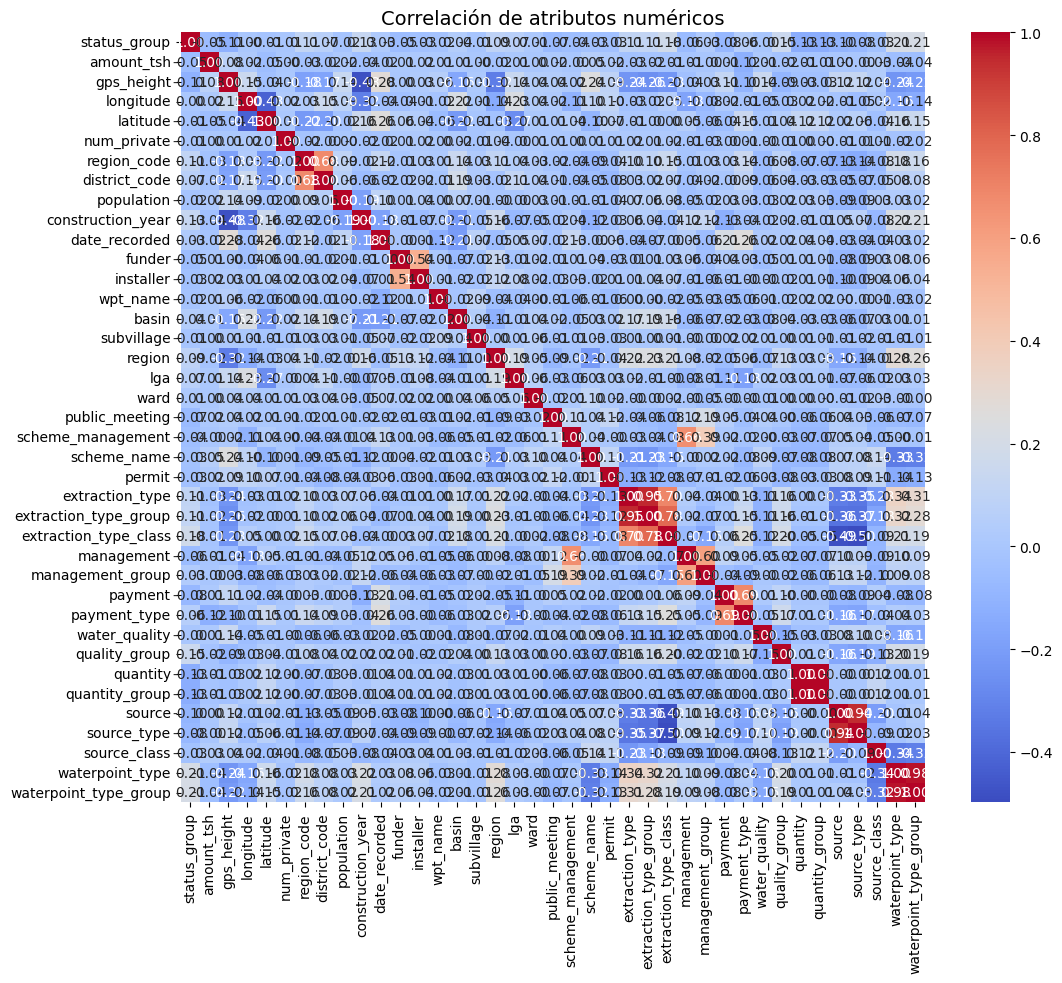

In [33]:
#vamos a prodar una mastriz de correlacion
tabla_clean = tabla_fusion_imputada.drop(['status_group_numeric', 'id','recorded_by'], axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(tabla_clean, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de atributos numéricos', size=14)
plt.show()


In [34]:
#Establecemos la Variable objetivo de nuesro DataSet
varObjCont =tabla_clean.status_group
#Establecemos Variables con las que vamos a trabajar
VarIndependientes= tabla_clean.drop(['status_group'],axis=1)

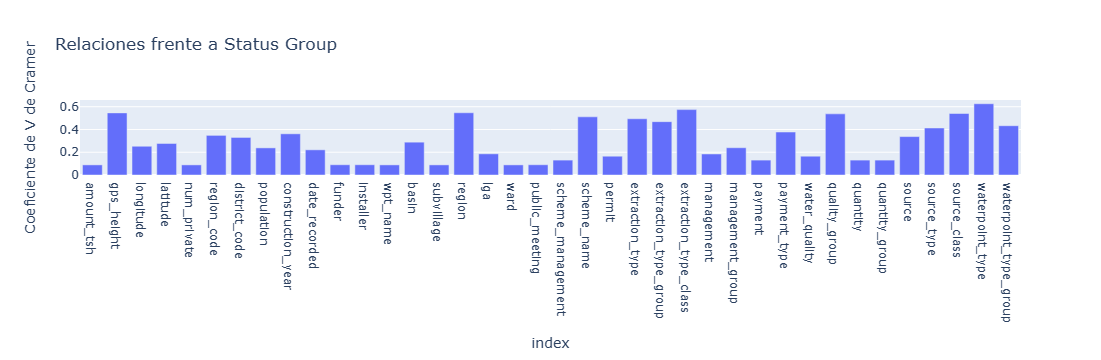

In [35]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px
# Función para calcular el coeficiente de V de Cramer
def cramers_v(var1, varObj):    
    if not var1.dtypes == 'category':
        var1 = pd.cut(var1, bins=5)
    if not varObj.dtypes == 'category':
        varObj = pd.cut(varObj, bins=5)
    data = pd.crosstab(var1, varObj).values
    chi2 = stats.chi2_contingency(data)[0]
    n = data.sum()
    min_dim = min(data.shape) - 1
    v_cramer = np.sqrt(chi2 / (n * min_dim))
    return v_cramer

# Calcular el coeficiente de V de Cramer para cada variable independiente
tabla_cramer = pd.DataFrame(index=VarIndependientes.columns, columns=['VCramer'])
for col in VarIndependientes.columns:
    tabla_cramer.loc[col, 'VCramer'] = cramers_v(VarIndependientes[col], varObjCont)

# Generar el gráfico de barras
fig = px.bar(tabla_cramer, x=tabla_cramer.index, y='VCramer', title='Relaciones frente a Status Group', labels={'VCramer': 'Coeficiente de V de Cramer'})
fig.update_yaxes(categoryorder="total ascending")
fig.show()


In [36]:
corr = abs(tabla_clean.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

## III. Preparacion de Modelos:

vamos ahora que tenemos una primera tabla vamos a intentar tirar un primer modelo el cual luego vamos a mejorar o cambiar para intentar mejorarlo

In [37]:
tabla_cleaned = tabla_fusion_imputada.drop(['status_group_numeric', 'id', 'recorded_by'], axis=1)
X = tabla_cleaned.drop('status_group', axis=1)  # Elimina la columna 'status_group' para obtener las características
y = tabla_fusion_imputada['status_group'] 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vamos a usar una funcion ver las metricas de nuestro modelo:

In [39]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

In [40]:
model1 = RandomForestClassifier().fit(X_train, y_train)

vamos a predecir nuestro 20%

In [41]:
y_pred = model1.predict(X_test)

In [42]:
y_pred

array([2., 0., 0., ..., 2., 0., 1.])

In [43]:
accuracy_RFC = model1.score(X_test, y_test)
accuracy_RFC

0.8108585858585858

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      6457
         1.0       0.56      0.35      0.43       851
         2.0       0.85      0.78      0.81      4572

    accuracy                           0.81     11880
   macro avg       0.74      0.67      0.70     11880
weighted avg       0.81      0.81      0.80     11880



In [45]:
# Ahora, para realizar la validación cruzada, por ejemplo, con 5 folds
cv_scores = cross_val_score(model1, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.81691919 0.80833333 0.81102694 0.80816498 0.80799663]
Mean cross-validation score: 0.8104882154882155


## Vamos a aplicar nuestro modelo sobre los valores de TestValues:

vamos a acomodar nuestros datos de TestValue para que coincidan con los del dataset que hemos estamodo limpiando:

In [46]:
TestValues_Cleaned = TestValues.copy()
TestValues_Cleaned = TestValues_Cleaned.drop(['id','recorded_by'], axis=1)

for column in TestValues_Cleaned.columns:
    # Verificar si la columna es de tipo categórico o booleano
    if TestValues_Cleaned[column].dtype == 'object' or TestValues_Cleaned[column].dtype == 'bool':
        # Aplicar el LabelEncoder a la columna
        TestValues_Cleaned[column] = le.fit_transform(TestValues_Cleaned[column])

# Obtener el orden de las columnas del DataFrame de referencia
orden_columnas_referencia = X.columns
# Reordenar las columnas del DataFrame objetivo
TestValues_Cleaned = TestValues_Cleaned[orden_columnas_referencia]
TestValues_Cleaned

# Mostrar el DataFrame label_encoded
TestValues_Cleaned.head(5)

amount_tsh  gps_height  longitude   latitude  num_private  region_code  \
0         0.0        1996  35.290799  -4.059696            0           21   
1         0.0        1569  36.656709  -3.309214            0            2   
2         0.0        1567  34.767863  -5.004344            0           13   
3         0.0         267  38.058046  -9.418672            0           80   
4       500.0        1260  35.006123 -10.950412            0           10   

   district_code  population  construction_year  date_recorded  funder  \
0              3         321                  1            255     175   
1              2         300                  0            255     250   
2              2         500                  1            252     979   
3             43         250                  4            242     222   
4              3          60                  0            306      73   

   installer  wpt_name  basin  subvillage  region  lga  ward  public_meeting  \
0        214       656      0        3916       8   63    17               1   
1        221      1780      5        2717       0    0   650               1   
2       1091      9673      0        5398      18  109  1677               1   
3        262      5595      7        2795       7   49  1192               2   
4         75      5706      7        3544      16   61  1075               2   

   scheme_management  scheme_name  permit  extraction_type  \
0                  2         1788       1                9   
1                  6         1609       1                3   
2                  6         1452       2                9   
3                  6         1788       1                9   
4                  9           76       1                3   

   extraction_type_group  extraction_type_class  management  management_group  \
0                      6                      3           3                 2   
1                      1                      0           7                 4   
2                      6                      3           7                 4   
3                      6                      3           7                 4   
4                      1                      0           9                 4   

   payment  payment_type  water_quality  quality_group  quantity  \
0        0             2              6              2         3   
1        0             2              6              2         2   
2        0             2              6              2         2   
3        6             6              6              2         0   
4        3             1              6              2         1   

   quantity_group  source  source_type  source_class  waterpoint_type  \
0               3       5            3             1                6   
1               2       8            6             0                1   
2               2       5            3             1                6   
3               0       7            5             0                6   
4               1       8            6             0                1   

   waterpoint_type_group  
0                      5  
1                      1  
2                      5  
3                      5  
4                      1

In [47]:
y_pred_total = model1.predict(TestValues_Cleaned)
y_pred_total

array([2., 0., 0., ..., 0., 0., 2.])

In [48]:
tabla_RandomForestClassifier = TestValues.copy()

# Agregar la columna de predicciones
tabla_RandomForestClassifier['status_group'] = y_pred_total

# Seleccionar solo las columnas 'id' y 'status_group'
tabla_RandomForestClassifier = tabla_RandomForestClassifier[['id', 'status_group']]

# Reemplazar los números por las etiquetas
mapping = {0: "functional", 1: "functional needs repair", 2: "non functional"}
tabla_RandomForestClassifier['status_group'] = tabla_RandomForestClassifier['status_group'].replace(mapping)

In [49]:
tabla_RandomForestClassifier

id    status_group
0      50785  non functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]

In [50]:
tabla_RandomForestClassifier.status_group.value_counts()

status_group
functional                 9444
non functional             5054
functional needs repair     352
Name: count, dtype: int64

In [51]:
# Nombre del archivo CSV
RandomForestClassifier = 'ResultadosRandomForestClassifier.csv'
# Guardar el DataFrame en un archivo CSV con valores separados por comas
tabla_RandomForestClassifier.to_csv(RandomForestClassifier, index=False, sep=',')
print(f"Los resultados se han guardado en '{RandomForestClassifier}'.")


Los resultados se han guardado en 'ResultadosRandomForestClassifier.csv'.


## Vamos a probar otros modelos

Support Vector Machine (SVM):

In [52]:
# model2 =SVC().fit(X_train, y_train)
# y_pred2 = model2.predict(X_test)

In [53]:
# accuracy_SVM = model2.score(X_test, y_test)
# accuracy_SVM

In [54]:
# print(classification_report(y_test, y_pred2))

In [55]:
# y_pred_total2 = model2.predict(TestValues_Cleaned)
# y_pred_total2

In [56]:
# tabla_SVC = TestValues.copy()
# # Agregar la columna de predicciones
# tabla_SVC ['status_group'] = y_pred_total2
# tabla_SVC  = tabla_SVC [['id', 'status_group']]

# # Reemplazar los números por las etiquetas
# mapping = {0: "functional", 1: "functional needs repair", 2: "non functional"}
# tabla_SVC['status_group'] = tabla_SVC['status_group'].replace(mapping)

In [57]:
# # Nombre del archivo CSV
# SVC = 'ResultadosSVC.csv'
# # Guardar el DataFrame en un archivo CSV con valores separados por comas
# tabla_SVC.to_csv(SVC, index=False, sep=',')
# print(f"Los resultados se han guardado en '{SVC}'.")

Gradient Boosting Classifier(GBC):

In [58]:
# model3 =GradientBoostingClassifier().fit(X_train, y_train)
# y_pred3 = model3.predict(X_test)

In [59]:
# accuracy_GBC = model3.score(X_test, y_test)
# accuracy_GBC

In [60]:
# print(classification_report(y_test, y_pred3))

In [61]:
# y_pred_total3 = model3.predict(TestValues_Cleaned)
# y_pred_total3

In [62]:
# tabla_GBC = TestValues.copy()
# # Agregar la columna de predicciones
# tabla_GBC ['status_group'] = y_pred_total3
# tabla_GBC  = tabla_GBC [['id', 'status_group']]

# # Reemplazar los números por las etiquetas
# mapping = {0: "functional", 1: "functional needs repair", 2: "non functional"}
# tabla_GBC['status_group'] = tabla_GBC['status_group'].replace(mapping)

In [63]:
# # Nombre del archivo CSV
# GBC = 'ResultadosGBC.csv'
# # Guardar el DataFrame en un archivo CSV con valores separados por comas
# tabla_GBC.to_csv(GBC, index=False, sep=',')
# print(f"Los resultados se han guardado en '{GBC}'.")

Redes Neuronales Artificiales:

In [64]:
# #Construir el modelo de red neuronal
# model_RNA = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(3, activation='softmax')])

In [65]:
# # Compilar el modelo
# model_RNA.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [66]:
# model4 = model_RNA.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

In [67]:
# test_loss, test_accuracy = model_RNA.evaluate(X_test, y_test)
# print("Precisión en el conjunto de prueba:", test_accuracy)

In [68]:
# y_pred4 = model_RNA.predict(TestValues_Cleaned)

In [69]:
# y_pred4

In [70]:
# #nos vamos a quedar con las mayores probabilidades:
# clases_predichas = np.argmax(y_pred4, axis=1)
# clases_predichas

In [71]:
# tabla_RNA = TestValues.copy()
# # Agregar la columna de predicciones
# tabla_RNA ['status_group'] = clases_predichas
# tabla_RNA  = tabla_RNA [['id', 'status_group']]

# # Reemplazar los números por las etiquetas
# mapping = {0: "functional", 1: "functional needs repair", 2: "non functional"}
# tabla_RNA['status_group'] = tabla_RNA['status_group'].replace(mapping)

In [72]:
# # Nombre del archivo CSV
# RNA = 'ResultadosRNA.csv'
# # Guardar el DataFrame en un archivo CSV con valores separados por comas
# tabla_RNA.to_csv(RNA, index=False, sep=',')
# print(f"Los resultados se han guardado en '{RNA}'.")

ExtraTreesClassifier (ETC):

In [73]:
# Crear el modelo ExtraTreesClassifier
model5 = ExtraTreesClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

In [74]:
y_pred5 = model5.predict(X_test)
y_pred5

array([2., 0., 0., ..., 2., 0., 1.])

In [75]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      6457
         1.0       0.50      0.38      0.43       851
         2.0       0.83      0.79      0.81      4572

    accuracy                           0.80     11880
   macro avg       0.71      0.68      0.69     11880
weighted avg       0.80      0.80      0.80     11880



In [76]:
y_pred_total5 = model5.predict(TestValues_Cleaned)
y_pred_total5

array([2., 0., 0., ..., 0., 0., 2.])

In [77]:
tabla_ETC = TestValues.copy()
# Agregar la columna de predicciones
tabla_ETC ['status_group'] = y_pred_total5
tabla_ETC  = tabla_ETC[['id', 'status_group']]

# Reemplazar los números por las etiquetas
mapping = {0: "functional", 1: "functional needs repair", 2: "non functional"}
tabla_ETC['status_group'] = tabla_ETC['status_group'].replace(mapping)

In [78]:
# Nombre del archivo CSV
ETC = 'ResultadosETC.csv'
# Guardar el DataFrame en un archivo CSV con valores separados por comas
tabla_ETC.to_csv(ETC, index=False, sep=',')
print(f"Los resultados se han guardado en '{ETC}'.")

Los resultados se han guardado en 'ResultadosETC.csv'.


## Habiendo probado algunos modelos vamos a intentar mejorar el Score a partir de eliminar variables con muchos nulos, tramificar, eliminar variables que nos dicen lo mimso  y retocar algunos hiperparametros de los modelos que mejor funcionaron que son RandomForestClassifier y ExtraTreesClassifier  

In [79]:
tabla_fusion_copy=tabla_fusion
TestValues_copy=TestValues

vamos a eliminar aquella variable que tenia muchos missings

In [80]:
tabla_fusion_copy.drop('scheme_name', axis=1, inplace=True)
TestValues_copy.drop('scheme_name', axis=1, inplace=True)

Eliminamos aquellas variables que vimos en nuestra tabla de correlacion que explican lo mismo y nos quedamos con las de mayor correlacion

In [81]:
tabla_fusion_copy.drop(['id','installer','management_group','status_group', 'num_private', 'wpt_name', 
                        'recorded_by', 'subvillage','region', 'quantity', 'water_quality', 'lga','ward', 
                        'source_type', 'payment', 'waterpoint_type_group','extraction_type_group',
                        'extraction_type_class'], axis=1, inplace=True)

TestValues_copy.drop(['id','installer','management_group', 'num_private', 'wpt_name', 'recorded_by', 
                      'subvillage','region', 'quantity', 'water_quality', 'lga','ward', 'source_type', 
                      'payment', 'waterpoint_type_group','extraction_type_group','extraction_type_class'
                      ], axis=1, inplace=True)

vamos a transformar a dias de antiguedad la variable Date_recorded que anteriormente habiamos eliminado para nuestro primeros modelos

In [82]:
date_train = pd.to_datetime(tabla_fusion_copy['date_recorded'])
date_test = pd.to_datetime(TestValues_copy['date_recorded'])

In [83]:
date_train.describe()

count                            59400
mean     2012-03-29 09:11:33.818181888
min                2002-10-14 00:00:00
25%                2011-04-01 00:00:00
50%                2012-10-10 00:00:00
75%                2013-02-09 00:00:00
max                2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [84]:
date_test.describe()

count                            14850
mean     2012-03-24 12:32:52.363636480
min                2001-03-26 00:00:00
25%                2011-03-31 00:00:00
50%                2012-10-07 00:00:00
75%                2013-02-08 00:00:00
max                2013-12-03 00:00:00
Name: date_recorded, dtype: object

Vamos a calcular la antiguedad hasta el 2013-12-03

In [85]:
date_recorder_train=(pd.to_datetime(' 2013-12-03') - date_train ).dt.days
date_recorder_test=(pd.to_datetime(' 2013-12-03') - date_test ).dt.days

reemplazamos en nuestros datos

In [86]:
#Ajustamos en nuestras tablas:
tabla_fusion_copy['date_recorded'] = date_recorder_train
TestValues_copy['date_recorded'] = date_recorder_test
tabla_fusion_copy.date_recorded.describe()

count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: date_recorded, dtype: float64

In [87]:
TestValues_copy.date_recorded.describe()

count    14850.000000
mean       618.477172
std        338.603783
min          0.000000
25%        298.000000
50%        422.000000
75%        978.000000
max       4635.000000
Name: date_recorded, dtype: float64

In [88]:
# Creamos los límites de los bins
bins = [0, 365, 365*2, 365*3, 365*4, 365*5, 365*6, 365*7, 365*8, 365*9, 365*10, 365*11, 365*12, 365*13]  

# Definimos las etiquetas para cada bin (años)
labels = ['0-1 año', '1-2 años', '2-3 años', '3-4 años', '4-5 años', '5-6 años', '6-7 años', '7-8 años', 
          '8-9 años', '9-10 años', '10-11 años', '11-12 años', '12-13 años']

# Utilizamos pd.cut para asignar cada valor a su respectivo bin
tabla_fusion_copy['date_recorded'] = pd.cut(tabla_fusion_copy['date_recorded'], bins=bins, labels=labels, right=False).astype('object')
TestValues_copy['date_recorded'] = pd.cut(TestValues_copy['date_recorded'], bins=bins, labels=labels, right=False).astype('object')
tabla_fusion_copy.head()

amount_tsh date_recorded        funder  gps_height  longitude   latitude  \
0      6000.0      2-3 años         Roman        1390  34.938093  -9.856322   
1         0.0       0-1 año       Grumeti        1399  34.698766  -2.147466   
2        25.0       0-1 año  Lottery Club         686  37.460664  -3.821329   
3         0.0       0-1 año        Unicef         263  38.486161 -11.155298   
4         0.0      2-3 años   Action In A           0  31.130847  -1.825359   

                     basin  region_code  district_code  population  \
0               Lake Nyasa           11              5         109   
1            Lake Victoria           20              2         280   
2                  Pangani           21              4         250   
3  Ruvuma / Southern Coast           90             63          58   
4            Lake Victoria           18              1           0   

  public_meeting scheme_management permit  construction_year extraction_type  \
0           True               VWC  False               1999         gravity   
1            NaN             Other   True               2010         gravity   
2           True               VWC   True               2009         gravity   
3           True               VWC   True               1986     submersible   
4           True               NaN   True                  0         gravity   

  management payment_type quality_group quantity_group                source  \
0        vwc     annually          good         enough                spring   
1        wug    never pay          good   insufficient  rainwater harvesting   
2        vwc   per bucket          good         enough                   dam   
3        vwc    never pay          good            dry           machine dbh   
4      other    never pay          good       seasonal  rainwater harvesting   

  source_class              waterpoint_type status_group_numeric  
0  groundwater           communal standpipe           functional  
1      surface           communal standpipe           functional  
2      surface  communal standpipe multiple           functional  
3  groundwater  communal standpipe multiple       non functional  
4      surface           communal standpipe           functional

In [89]:
tabla_fusion_copy.construction_year

0        1999
1        2010
2        2009
3        1986
4           0
         ... 
59395    1999
59396    1996
59397       0
59398       0
59399    2002
Name: construction_year, Length: 59400, dtype: int64

In [90]:
TestValues_copy.construction_year

0        10s
1        00s
2        10s
3        80s
4        00s
        ... 
14845    80s
14846    90s
14847    10s
14848    00s
14849    00s
Name: construction_year, Length: 14850, dtype: object

volvemos a transformar nuestra columna construction_wrangler

In [91]:
def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'    
tabla_fusion_copy['construction_year'] = tabla_fusion_copy.apply(lambda row: construction_wrangler(row), axis=1)

Acomodamos nuestras columnas para que queden iguales

In [92]:
tabla_fusion_copy = tabla_fusion_copy.reindex(columns=tabla_fusion.columns)
TestValues_copy = TestValues_copy.reindex(columns=tabla_fusion.columns)

In [93]:
tabla_fusion_copy.isna().sum().sort_values(ascending=False)

scheme_management       3878
funder                  3637
public_meeting          3334
permit                  3056
construction_year          0
waterpoint_type            0
source_class               0
source                     0
quantity_group             0
quality_group              0
payment_type               0
management                 0
extraction_type            0
amount_tsh                 0
date_recorded              0
population                 0
district_code              0
region_code                0
basin                      0
latitude                   0
longitude                  0
gps_height                 0
status_group_numeric       0
dtype: int64

vamos a imputar los valores faltantes para hacer una transformacion ordinal de aquellas variables sobre las que vamos a mantener cierto control

In [94]:
tabla_fusion_copy["quality_group"].fillna("unknown", inplace = True)
tabla_fusion_copy["quantity_group"].fillna("unknown", inplace = True)
tabla_fusion_copy["payment_type"].fillna("unknown", inplace = True)
tabla_fusion_copy["public_meeting"].fillna("unknown", inplace = True)
tabla_fusion_copy["permit"].fillna("unknown", inplace = True)

TestValues_copy["quality_group"].fillna("unknown", inplace = True)
TestValues_copy["quantity_group"].fillna("unknown", inplace = True)
TestValues_copy["payment_type"].fillna("unknown", inplace = True)
TestValues_copy["public_meeting"].fillna("unknown", inplace = True)
TestValues_copy["permit"].fillna("unknown", inplace = True)


vamos a realizar algunas transformaciones Ordinales sobre aquellas variables que queremos controlar:

In [95]:
#vamos a trabajar sobre la Calidad:
order_dict_quality = {"good":3,"salty":2,"milky":2,"colored":2,"fluoride":2,"unknown":1}
tabla_fusion_copy["quality_group"] = [order_dict_quality[item] for item in tabla_fusion_copy.quality_group]
TestValues_copy["quality_group"] = [order_dict_quality[item] for item in TestValues_copy.quality_group]

#vamos a trabajar sobre la cantidad
order_dict_quantity = {"enough":3,"insufficient":2,"dry":2,"seasonal":2,"unknown":1}
tabla_fusion_copy["quantity_group"] = [order_dict_quantity[item] for item in tabla_fusion_copy.quantity_group]
TestValues_copy["quantity_group"] = [order_dict_quantity[item] for item in TestValues_copy.quantity_group]

#vamos a trabajar sobre el tipo de pago
order_dict_payment = {"monthly":4,"annually":4,"on failure":3,"per bucket":3,"never pay":2,"unknown":1,"other":1}
tabla_fusion_copy["payment_type"] = [order_dict_payment[item] for item in tabla_fusion_copy.payment_type]
TestValues_copy["payment_type"] = [order_dict_payment[item] for item in TestValues_copy.payment_type]

#vamos a reemplazar los valores de public_meeting:
order_dict_pub_meet = {True:2,False:1,"unknown":0}
tabla_fusion_copy["public_meeting"] = [order_dict_pub_meet[item] for item in tabla_fusion_copy.public_meeting] 
TestValues_copy["public_meeting"] = [order_dict_pub_meet[item] for item in TestValues_copy.public_meeting] 

#vamos a reemplazar los valores de pemit:
order_dict_permit = {True:2,False:1,"unknown":0}
tabla_fusion_copy["permit"] = [order_dict_pub_meet[item] for item in tabla_fusion_copy.permit] 
TestValues_copy["permit"] = [order_dict_pub_meet[item] for item in TestValues_copy.permit] 

#vamos a reemplazar los valores de amount_tsh para saber si el pozo tiene suficiente agua:
tabla_fusion_copy.loc[tabla_fusion_copy['amount_tsh'] < 150000, 'amount_tsh'] = 0
tabla_fusion_copy.loc[tabla_fusion_copy['amount_tsh'] >= 150000, 'amount_tsh'] = 1
TestValues_copy.loc[TestValues_copy['amount_tsh'] < 150000, 'amount_tsh'] = 0
TestValues_copy.loc[TestValues_copy['amount_tsh'] >= 150000, 'amount_tsh'] = 1


In [96]:
tabla_fusion_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount_tsh            59400 non-null  float64
 1   date_recorded         59400 non-null  object 
 2   funder                55763 non-null  object 
 3   gps_height            59400 non-null  int64  
 4   longitude             59400 non-null  float64
 5   latitude              59400 non-null  float64
 6   basin                 59400 non-null  object 
 7   region_code           59400 non-null  int64  
 8   district_code         59400 non-null  int64  
 9   population            59400 non-null  int64  
 10  public_meeting        59400 non-null  int64  
 11  scheme_management     55522 non-null  object 
 12  permit                59400 non-null  int64  
 13  construction_year     59400 non-null  object 
 14  extraction_type       59400 non-null  object 
 15  management         

Reemplazamos nuestros valores faltantes con nuestra funcion:

In [97]:
def imputar_datos(tabla_fusion_copy):
    # Imputación para variables numéricas con KNN
    imputer_numericas = KNNImputer()
    df_numericas = tabla_fusion.select_dtypes(include=['float', 'int'])
    df_numericas_imputadas = imputer_numericas.fit_transform(df_numericas)
    df_numericas_imputadas = pd.DataFrame(df_numericas_imputadas, columns=df_numericas.columns)
    
    # Imputación para variables categóricas con moda
    df_categoricas = tabla_fusion.select_dtypes(include=['object'])
    df_categoricas_imputadas = df_categoricas.apply(lambda x: x.fillna(x.value_counts().index[0]))
    
    # Combinar dataframes
    tabla_fusion_copy = pd.concat([df_numericas_imputadas, df_categoricas_imputadas], axis=1)
    
    return tabla_fusion_copy

tabla_fusion_copy = imputar_datos(tabla_fusion_copy)

In [98]:
tabla_fusion_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount_tsh            59400 non-null  float64
 1   gps_height            59400 non-null  float64
 2   longitude             59400 non-null  float64
 3   latitude              59400 non-null  float64
 4   region_code           59400 non-null  float64
 5   district_code         59400 non-null  float64
 6   population            59400 non-null  float64
 7   date_recorded         59400 non-null  object 
 8   funder                59400 non-null  object 
 9   basin                 59400 non-null  object 
 10  public_meeting        59400 non-null  bool   
 11  scheme_management     59400 non-null  object 
 12  permit                59400 non-null  bool   
 13  construction_year     59400 non-null  object 
 14  extraction_type       59400 non-null  object 
 15  management         

con ayuda de LabelEncode pasamos nuestras variables a numericas:

In [99]:
le = LabelEncoder()
for column in tabla_fusion_copy.columns:
    # Verificar si la columna es de tipo categórico o booleano
    if tabla_fusion_copy[column].dtype == 'object' or tabla_fusion_copy[column].dtype == 'bool':
        # Aplicar el LabelEncoder a la columna
        tabla_fusion_copy[column] = le.fit_transform(tabla_fusion_copy[column])     

# Mostrar el DataFrame label_encoded
tabla_fusion_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount_tsh            59400 non-null  float64
 1   gps_height            59400 non-null  float64
 2   longitude             59400 non-null  float64
 3   latitude              59400 non-null  float64
 4   region_code           59400 non-null  float64
 5   district_code         59400 non-null  float64
 6   population            59400 non-null  float64
 7   date_recorded         59400 non-null  int32  
 8   funder                59400 non-null  int32  
 9   basin                 59400 non-null  int32  
 10  public_meeting        59400 non-null  int64  
 11  scheme_management     59400 non-null  int32  
 12  permit                59400 non-null  int64  
 13  construction_year     59400 non-null  int32  
 14  extraction_type       59400 non-null  int32  
 15  management         

In [100]:
for column in TestValues_copy.columns:
    # Verificar si la columna es de tipo categórico o booleano
    if TestValues_copy[column].dtype == 'object' or TestValues_copy[column].dtype == 'bool':
        # Aplicar el LabelEncoder a la columna
        TestValues_copy[column] = le.fit_transform(TestValues_copy[column])
TestValues_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount_tsh            14850 non-null  float64
 1   date_recorded         14850 non-null  int32  
 2   funder                14850 non-null  int32  
 3   gps_height            14850 non-null  int64  
 4   longitude             14850 non-null  float64
 5   latitude              14850 non-null  float64
 6   basin                 14850 non-null  int32  
 7   region_code           14850 non-null  int64  
 8   district_code         14850 non-null  int64  
 9   population            14850 non-null  int64  
 10  public_meeting        14850 non-null  int64  
 11  scheme_management     14850 non-null  int32  
 12  permit                14850 non-null  int64  
 13  construction_year     14850 non-null  int32  
 14  extraction_type       14850 non-null  int32  
 15  management         

In [101]:
# Obtener el orden de las columnas de tabla_fusion_copy y aplicarlo a TestValues_copy
TestValues_copy = TestValues_copy.reindex(columns=tabla_fusion_copy.columns)

In [102]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tabla_fusion_copy.drop('status_group_numeric', axis=1), 
                                                    tabla_fusion_copy['status_group_numeric'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [103]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11880 entries, 2980 to 41264
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         11880 non-null  float64
 1   gps_height         11880 non-null  float64
 2   longitude          11880 non-null  float64
 3   latitude           11880 non-null  float64
 4   region_code        11880 non-null  float64
 5   district_code      11880 non-null  float64
 6   population         11880 non-null  float64
 7   date_recorded      11880 non-null  int32  
 8   funder             11880 non-null  int32  
 9   basin              11880 non-null  int32  
 10  public_meeting     11880 non-null  int64  
 11  scheme_management  11880 non-null  int32  
 12  permit             11880 non-null  int64  
 13  construction_year  11880 non-null  int32  
 14  extraction_type    11880 non-null  int32  
 15  management         11880 non-null  int32  
 16  payment_type       11880

In [104]:
# # Ahora puedes realizar la búsqueda de cuadrícula y entrenar el modelo utilizando los datos de entrenamiento

# from sklearn.ensemble import RandomForestClassifier
# # Definir los hiperparámetros que deseas probar
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Crear el modelo RandomForestClassifier
# modelRRFFCC = RandomForestClassifier(random_state=42)

# # Realizar la búsqueda de cuadrícula
# grid_search = GridSearchCV(estimator=modelRRFFCC, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)


In [105]:
# # Después de realizar la búsqueda de cuadrícula, obtener los mejores parámetros
# best_params = grid_search.best_params_
# print("Mejores parámetros encontrados:")
# print(best_params)

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# Utilizar los mejores parámetros para crear un nuevo modelo RandomForestClassifier
best_rf_model = RandomForestClassifier(random_state=42, 
                                        max_depth=None, 
                                        min_samples_leaf=2, 
                                        min_samples_split=5, 
                                        n_estimators=200)
# Entrenar el modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred_test = best_rf_model.predict(X_test)
# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
print("Precisión del modelo en el conjunto de prueba:", accuracy)


Precisión del modelo en el conjunto de prueba: 0.814057239057239


In [107]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6457
           1       0.62      0.31      0.41       851
           2       0.85      0.77      0.81      4572

    accuracy                           0.81     11880
   macro avg       0.76      0.66      0.69     11880
weighted avg       0.81      0.81      0.81     11880



In [108]:
TestValues_copy.drop('status_group_numeric', axis=1, inplace=True)

In [109]:
y_pred_TestValues = best_rf_model.predict(TestValues_copy)
y_pred_TestValues

array([2, 0, 0, ..., 0, 0, 0])

In [110]:
TestValues2= pd.read_csv(path + "Test_Values.Csv", sep=',')

In [111]:
tabla_RRFFCC= TestValues2.copy()
# Agregar la columna de predicciones
tabla_RRFFCC ['status_group'] = y_pred_TestValues
tabla_RRFFCC  = tabla_RRFFCC[['id', 'status_group']]

# Reemplazar los números por las etiquetas
mapping = {0: "functional", 1: "functional needs repair", 2: "non functional"}
tabla_RRFFCC['status_group'] = tabla_RRFFCC['status_group'].replace(mapping)

In [112]:
# Nombre del archivo CSV
RRFFCC = 'ResultadosRRFFCC.csv'
# Guardar el DataFrame en un archivo CSV con valores separados por comas
tabla_RRFFCC.to_csv(RRFFCC, index=False, sep=',')
print(f"Los resultados se han guardado en '{RRFFCC}'.")

Los resultados se han guardado en 'ResultadosRRFFCC.csv'.


Vamos a probar usando todas las variables a ver si conseguimos mejorar el score

In [113]:
TestValues3=pd.read_csv(path + "Test_Values.Csv", sep=',')
TestValues3.head()

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

                     basin  subvillage   region  region_code  district_code  \
0                 Internal      Magoma  Manyara           21              3   
1                  Pangani     Kimnyak   Arusha            2              2   
2                 Internal       Msatu  Singida           13              2   
3  Ruvuma / Southern Coast  Kipindimbi    Lindi           80             43   
4  Ruvuma / Southern Coast     Losonga   Ruvuma           10              3   

             lga          ward  population public_meeting  \
0          Mbulu        Bashay         321           True   
1   Arusha Rural      Kimnyaki         300           True   
2  Singida Rural          Puma         500           True   
3         Liwale       Mkutano         250            NaN   
4         Mbinga  Mbinga Urban          60            NaN   

               recorded_by scheme_management     scheme_name permit  \
0  GeoData Consultants Ltd        Parastatal             NaN   True   
1  GeoData Consultants Ltd               VWC  TPRI pipe line   True   
2  GeoData Consultants Ltd               VWC               P    NaN   
3  GeoData Consultants Ltd               VWC             NaN   True   
4  GeoData Consultants Ltd       Water Board          BRUDER   True   

   construction_year extraction_type extraction_type_group  \
0               2012           other                 other   
1               2000         gravity               gravity   
2               2010           other                 other   
3               1987           other                 other   
4               2000         gravity               gravity   

  extraction_type_class   management management_group      payment  \
0                 other   parastatal       parastatal    never pay   
1               gravity          vwc       user-group    never pay   
2                 other          vwc       user-group    never pay   
3                 other          vwc       user-group      unknown   
4               gravity  water board       user-group  pay monthly   

  payment_type water_quality quality_group      quantity quantity_group  \
0    never pay          soft          good      seasonal       seasonal   
1    never pay          soft          good  insufficient   insufficient   
2    never pay          soft          good  insufficient   insufficient   
3      unknown          soft          good           dry            dry   
4      monthly          soft          good        enough         enough   

                 source           source_type source_class  \
0  rainwater harvesting  rainwater harvesting      surface   
1                spring                spring  groundwater   
2  rainwater harvesting  rainwater harvesting      surface   
3          shallow well          shallow well  groundwater   
4                spring                spring  groundwater   

      waterpoint_type waterpoint_type_group  
0               other                 other  
1  communal standpipe    communal standpipe  
2               other                 other  
3               other      

In [114]:
tabla_fusion2 = pd.merge(TainingLabels, TainingValues, how='left', on='id')
tabla_fusion2.head()

id    status_group  amount_tsh date_recorded        funder  gps_height  \
0  69572      functional      6000.0    2011-03-14         Roman        1390   
1   8776      functional         0.0    2013-03-06       Grumeti        1399   
2  34310      functional        25.0    2013-02-25  Lottery Club         686   
3  67743  non functional         0.0    2013-01-28        Unicef         263   
4  19728      functional         0.0    2011-07-13   Action In A           0   

      installer  longitude   latitude              wpt_name  num_private  \
0         Roman  34.938093  -9.856322                  none            0   
1       GRUMETI  34.698766  -2.147466              Zahanati            0   
2  World vision  37.460664  -3.821329           Kwa Mahundi            0   
3        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4       Artisan  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe mul

aplicamos algunas transformaciones 

In [115]:
# 1-transformamos los años a decadas:
def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'    
tabla_fusion2['construction_year'] = tabla_fusion2.apply(lambda row: construction_wrangler(row), axis=1)
TestValues3['construction_year'] = TestValues3.apply(lambda row: construction_wrangler(row), axis=1)

# 2-tranformamos a numeros la columna data_record
date_train2 = pd.to_datetime(tabla_fusion2['date_recorded'])
date_test2 = pd.to_datetime(TestValues3['date_recorded'])
date_recorder_train2=(pd.to_datetime(' 2013-12-03') - date_train2 ).dt.days
date_recorder_test2=(pd.to_datetime(' 2013-12-03') - date_test2 ).dt.days
tabla_fusion2['date_recorded'] = date_recorder_train2
TestValues3['date_recorded'] = date_recorder_test2
# Creamos los límites de los bins
bins = [0, 365, 365*2, 365*3, 365*4, 365*5, 365*6, 365*7, 365*8, 365*9, 365*10, 365*11, 365*12, 365*13] 
# Definimos las etiquetas para cada bin (años)
labels = ['0-1 año', '1-2 años', '2-3 años', '3-4 años', '4-5 años', '5-6 años', '6-7 años', '7-8 años', 
          '8-9 años', '9-10 años', '10-11 años', '11-12 años', '12-13 años']
# Utilizamos pd.cut para asignar cada valor a su respectivo bin
tabla_fusion2['date_recorded'] = pd.cut(tabla_fusion2['date_recorded'], bins=bins, labels=labels, right=False).astype('object')
TestValues3['date_recorded'] = pd.cut(TestValues3['date_recorded'], bins=bins, labels=labels, right=False).astype('object')

# 3-Eliminamos la columna con muchos missings
tabla_fusion2.drop('scheme_name', axis=1, inplace=True)
TestValues3.drop('scheme_name', axis=1, inplace=True)

# 4-imputamos los missings
def imputar_datos(tabla_fusion2):
    # Imputación para variables numéricas con KNN
    imputer_numericas = KNNImputer()
    df_numericas = tabla_fusion.select_dtypes(include=['float', 'int'])
    df_numericas_imputadas = imputer_numericas.fit_transform(df_numericas)
    df_numericas_imputadas = pd.DataFrame(df_numericas_imputadas, columns=df_numericas.columns)
    
    # Imputación para variables categóricas con moda
    df_categoricas = tabla_fusion.select_dtypes(include=['object'])
    df_categoricas_imputadas = df_categoricas.apply(lambda x: x.fillna(x.value_counts().index[0]))
    
    # Combinar dataframes
    tabla_fusion2 = pd.concat([df_numericas_imputadas, df_categoricas_imputadas], axis=1)
    
    return tabla_fusion2
tabla_fusion2 = imputar_datos(tabla_fusion2)

# 5-reemplazamos con labelencode
from sklearn.preprocessing import LabelEncoder

def label_encode_pro(data):
    le = LabelEncoder()
    for column in data.columns:
        # Verificar si la columna es de tipo categórico o booleano
        if data[column].dtype == 'object' or data[column].dtype == 'bool':
            # Aplicar el LabelEncoder a la columna
            data[column] = le.fit_transform(data[column])
    return data
# Llamar la función label_encode_pro con cada tabla como argumento
tabla_fusion2 = label_encode_pro(tabla_fusion2)
TestValues3 = label_encode_pro(TestValues3)

#6- ordenamos las columnas
column_order = [col for col in tabla_fusion2.columns if col != 'status_group_numeric']
TestValues3 = TestValues3[column_order]

In [116]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tabla_fusion2.drop('status_group_numeric', axis=1), 
                                                    tabla_fusion2['status_group_numeric'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [117]:
# Utilizar los mejores parámetros para crear un nuevo modelo RandomForestClassifier
best_rf_model = RandomForestClassifier(random_state=42, 
                                        max_depth=None, 
                                        min_samples_leaf=2, 
                                        min_samples_split=5, 
                                        n_estimators=200)
# Entrenar el modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred_test = best_rf_model.predict(X_test)
# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
print("Precisión del modelo en el conjunto de prueba:", accuracy)

Precisión del modelo en el conjunto de prueba: 0.814057239057239


In [118]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6457
           1       0.62      0.31      0.41       851
           2       0.85      0.77      0.81      4572

    accuracy                           0.81     11880
   macro avg       0.76      0.66      0.69     11880
weighted avg       0.81      0.81      0.81     11880



In [119]:
y_pred_TestValues = best_rf_model.predict(TestValues3)
y_pred_TestValues

array([2, 0, 0, ..., 0, 0, 2])

In [120]:
tabla_RRFFCC_ALL= pd.read_csv(path + "Test_Values.Csv", sep=',')
# Agregar la columna de predicciones
tabla_RRFFCC_ALL ['status_group'] = y_pred_TestValues
tabla_RRFFCC_ALL  = tabla_RRFFCC_ALL[['id', 'status_group']]

# Reemplazar los números por las etiquetas
mapping = {0: "functional", 1: "functional needs repair", 2: "non functional"}
tabla_RRFFCC_ALL['status_group'] = tabla_RRFFCC_ALL['status_group'].replace(mapping)

In [121]:
# Nombre del archivo CSV
RRFFCC_ALL = 'ResultadosRRFFCC_ALL.csv'
# Guardar el DataFrame en un archivo CSV con valores separados por comas
tabla_RRFFCC_ALL.to_csv(RRFFCC_ALL, index=False, sep=',')
print(f"Los resultados se han guardado en '{RRFFCC_ALL}'.")

Los resultados se han guardado en 'ResultadosRRFFCC_ALL.csv'.


Ahora vamos a probar con nuestro otro modelo que funciono bien el ExtraTreesClassifier (ETC)

In [122]:
best_ETC_model =ExtraTreesClassifier(random_state=42, 
                                        max_depth=None, 
                                        min_samples_leaf=2, 
                                        min_samples_split=5, 
                                        n_estimators=200)
# Entrenar el modelo con los datos de entrenamiento
best_ETC_model.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred_test = best_ETC_model.predict(X_test)
# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
print("Precisión del modelo en el conjunto de prueba:", accuracy)

Precisión del modelo en el conjunto de prueba: 0.8088383838383838


In [123]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6457
           1       0.64      0.29      0.40       851
           2       0.85      0.76      0.80      4572

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



In [124]:
y_pred_TestValues = best_ETC_model.predict(TestValues3)
y_pred_TestValues

array([2, 0, 0, ..., 0, 0, 2])

In [125]:
tabla_ETC_ALL= pd.read_csv(path + "Test_Values.Csv", sep=',')
# Agregar la columna de predicciones
tabla_ETC_ALL ['status_group'] = y_pred_TestValues
tabla_ETC_ALL  = tabla_ETC_ALL[['id', 'status_group']]

# Reemplazar los números por las etiquetas
mapping = {0: "functional", 1: "functional needs repair", 2: "non functional"}
tabla_ETC_ALL['status_group'] = tabla_ETC_ALL['status_group'].replace(mapping)

In [126]:
# Nombre del archivo CSV
ETC_ALL = 'ResultadosETC_ALL.csv'
# Guardar el DataFrame en un archivo CSV con valores separados por comas
tabla_ETC_ALL.to_csv(ETC_ALL, index=False, sep=',')
print(f"Los resultados se han guardado en '{ETC_ALL}'.")

Los resultados se han guardado en 'ResultadosETC_ALL.csv'.
